In [2]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import cross_val_score

In [3]:
# Importing the dataset
df = pd.read_csv("phishing_dataset.csv")
df.pop("id")
df.pop("RightClick")
df.pop("Iframe")
df.pop("on_mouseover")
df.pop("Favicon")
df["Result"].replace(-1, 0, inplace=True)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Redirect,popUpWidnow,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,0,1,-1,-1,-1,-1,1,1,-1,0
1,1,1,1,1,1,-1,0,1,-1,1,...,0,1,-1,-1,0,-1,1,1,1,0
2,1,0,1,1,1,-1,-1,-1,-1,1,...,0,1,1,-1,1,-1,1,0,-1,0
3,1,0,1,1,1,-1,-1,-1,1,1,...,0,1,-1,-1,1,-1,1,-1,1,0
4,1,0,-1,1,1,-1,1,1,-1,1,...,0,-1,-1,-1,0,-1,1,1,1,1


In [4]:
# Separating the data into X and y
logistic_df = df.copy(deep=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
# Splitting the dataset into the Training set, Validation set and Test set

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.4, random_state=0)

# Reshaping y to be a 2D array
y_2d_train= y_train.reshape(-1, 1)
y_2d_test = y_test.reshape(-1, 1)


# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Kernel

In [6]:
svm = SVC(kernel="linear", C=1).fit(X_train, y_train)
print(f"Accuracy for SVM with linear function kernel and C=1: {svm.score(X_test, y_test)}%")

scores_res = cross_val_score(svm, X_test, y_test, cv=5)
print(f"Accuracy for SVM with linear function kernel and C=1 using cross validation: {scores_res.mean()}%")

Accuracy for SVM with linear function kernel and C=1: 0.9228855721393034%
Accuracy for SVM with linear function kernel and C=1 using cross validation: 0.9235675026203441%


### Changing regularization Parameter

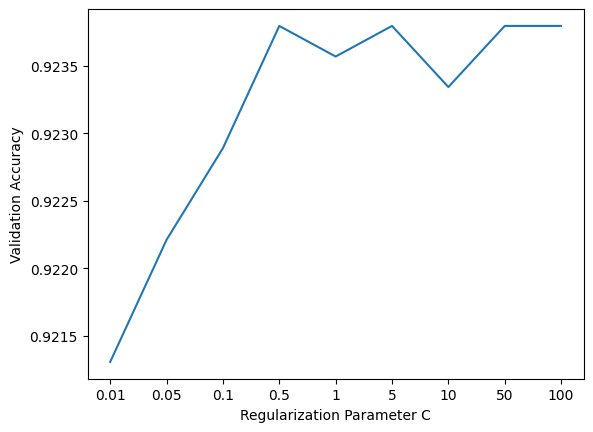

Best C value: 5 with accuracy of 0.923794002607562%


In [10]:
validation_scores = []
c_vals = [.01,.05,.1,.5,1,5,10,50,100]
for c in c_vals:
    svm = SVC(kernel="linear", C=c).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_test, y_test, cv=5)
    validation_scores.append(scores_res.mean())

default_x_ticks = range(len(c_vals))
plt.plot(default_x_ticks, validation_scores)
plt.xticks(default_x_ticks, c_vals)
plt.xlabel("Regularization Parameter C")
plt.ylabel("Validation Accuracy")
plt.show()

best_C = c_vals[np.argmax(validation_scores)]
print(f"Best C value: {best_C} with accuracy of {max(validation_scores)}%")

Overall, changing the regularization term value for the linear kernel only had small affects on the accuracy of the model

### Polynomial Kernel

In [7]:
svm = SVC(kernel="poly", C=1).fit(X_train, y_train)
print(f"Accuracy for SVM with polynomial function kernel and C=1: {svm.score(X_test, y_test)}%")

scores_res = cross_val_score(svm, X_test, y_test, cv=5)
print(f"Accuracy for SVM with polynomial function kernel and C=1 using cross validation: {scores_res.mean()}%")

Accuracy for SVM with polynomial function kernel and C=1: 0.9466304839439168%
Accuracy for SVM with polynomial function kernel and C=1 using cross validation: 0.9335184191016694%


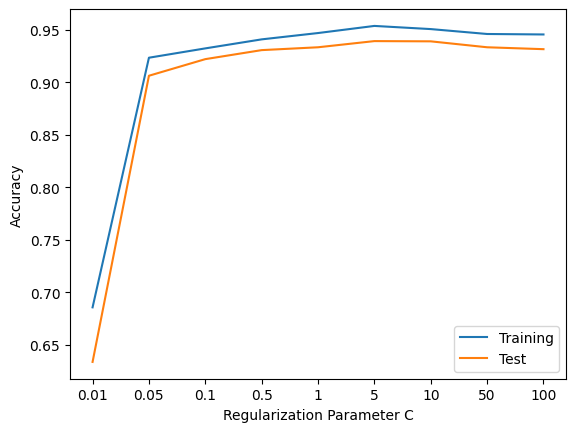

Best C value: 5 with accuracy of 0.9393971930362758%


In [9]:
training_scores = []
validation_scores = []
c_vals = [.01,.05,.1,.5,1,5,10,50,100]

for c in c_vals:
    svm = SVC(kernel="poly", C=c).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_train, y_train, cv=5)
    training_scores.append(scores_res.mean())

for c in c_vals:
    svm = SVC(kernel="poly", C=c).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_test, y_test, cv=5)
    validation_scores.append(scores_res.mean())


default_x_ticks = range(len(c_vals))
plt.plot(default_x_ticks, training_scores, label="Training")
plt.plot(default_x_ticks, validation_scores, label="Test")
plt.xticks(default_x_ticks, c_vals)
plt.legend()
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")
plt.show()

best_C = c_vals[np.argmax(validation_scores)]
print(f"Best C value: {best_C} with accuracy of {max(validation_scores)}%")

Tuning the regularization parameter for the polynomial kernal seemed to have large affects on the validation accuracy. Very small C values seemed to perform poorly.

#### Polynomial Degree Tuning

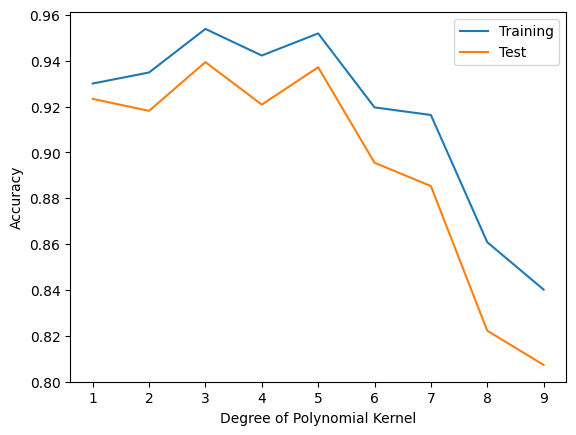

Best degree value: 3 with accuracy of 0.9393971930362758% using best C value of 5


In [11]:
training_scores = []
validation_scores = []

for degree in range(1, 10):
    svm = SVC(kernel="poly", C=5,degree=degree).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_train, y_train, cv=5)
    training_scores.append(scores_res.mean())

for degree in range(1, 10):
    svm = SVC(kernel="poly", C=5,degree=degree).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_test, y_test, cv=5)
    validation_scores.append(scores_res.mean())

plt.plot(range(1,10), training_scores, label="Training")
plt.plot(range(1,10), validation_scores, label="Test")
plt.legend()
plt.xlabel("Degree of Polynomial Kernel")
plt.ylabel("Accuracy")
plt.show()

best_degree = range(1,10)[np.argmax(validation_scores)]
print(f"Best degree value: {best_degree} with accuracy of {max(validation_scores)}% using best C value of 5")


### Radial-Based function (rbf) Kernal

In [12]:
svm = SVC(kernel="rbf", C=1).fit(X_train, y_train)
print(f"Accuracy for SVM with rbf kernel and C=1: {svm.score(X_test, y_test)}%")

scores_res = cross_val_score(svm, X_test, y_test, cv=5)
print(f"Accuracy for SVM with rbf kernel and C=1 using cross validation: {scores_res.mean()}%")

Accuracy for SVM with rbf kernel and C=1: 0.945273631840796%
Accuracy for SVM with rbf kernel and C=1 using cross validation: 0.9389439374185138%


#### Regularization Paramater Tuning

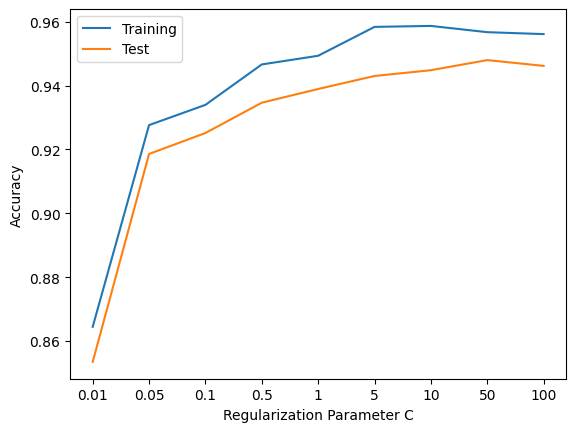

Best C value: 50 with accuracy of 0.9479857862310505%


In [13]:
training_scores = []
validation_scores = []
c_vals = [.01,.05,.1,.5,1,5,10,50,100]

for c in c_vals:
    svm = SVC(kernel="rbf", C=c).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_train, y_train, cv=5)
    training_scores.append(scores_res.mean())
for c in c_vals:
    svm = SVC(kernel="rbf", C=c).fit(X_train, y_train)
    scores_res = cross_val_score(svm, X_test, y_test, cv=5)
    validation_scores.append(scores_res.mean())

default_x_ticks = range(len(c_vals))
plt.plot(default_x_ticks, training_scores, label="Training")
plt.plot(default_x_ticks, validation_scores, label="Test")
plt.xticks(default_x_ticks, c_vals)
plt.legend()
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")
plt.show()

best_C = c_vals[np.argmax(validation_scores)]
print(f"Best C value: {best_C} with accuracy of {max(validation_scores)}%")

### Conclusion

Regardless of the kernal choice between linear, polynomial, and RBF functions, the accuracy of each were quite similar and in range of 92-95% with the best tuning. The Linear kernal performed the worst with an accuracy ~92.4% with its best known tuned parameters. Polynomial kernel performed only slightly better with an accuracy of ~93.9% using degree 3 and C=5. The overall best model was the rbf kernal with an accuracy of ~94.8% with regularization parameter C being 50.